# Data Exploration #
For learning to work with xarray and NetCDF files, starting with a control run timeseries for SST.

In [1]:
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range")

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [2]:
rootdir = '/local/projects/so_predict/esm2m_froelicher/'
subdir = 'CTRL'
var = 'SST'
ds = xr.open_mfdataset(rootdir+subdir+'/'+var+'/'+'sst_*.nc')

### Compute climatology

In [3]:
sst_climatology = ds.groupby('time.month').mean()

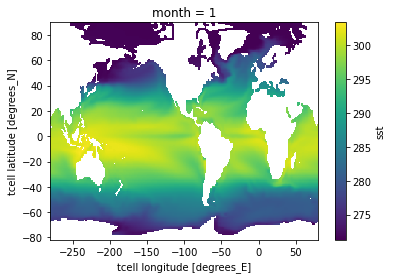

In [5]:
jan_sst_climatology_plt = sst_climatology.sst.isel(month=0).plot()

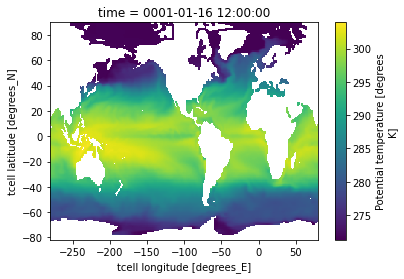

In [6]:
jan_sst_0001_plt = ds.sst.isel(time=0).plot()

### Compute anomalies
Generate a DataArray of the same dimension as the specified variable (SST in this case) and then subtract the climatology from the monthly control run data.

In [8]:
anom_year_0001 = ds.sst.isel(time=0) - sst_climatology.sst.isel(month=0)
# anom_year_0001

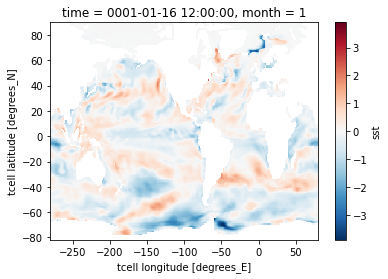

In [9]:
anom_year_0001.plot()

In [1]:
# compute the monthly anomalies from the 300-year control runs
def compute_ctrl_anomalies(path):
    ds = xr.open_mfdataset(path)
    
    climatology = ds.groupby('time.month').mean(dim='time')

    seq = []
    for i in range(0,300):
        seq.append(climatology)

    climatology_full = xr.concat(seq, 'month')
    climatology_full = climatology_full.assign_coords(month=ds.time.values)
    climatology_full = climatology_full.rename({'month':'time'})

    return (ds - climatology_full)

In [11]:
path = rootdir+subdir
sst_anom = compute_ctrl_anomalies(path, 'sst')

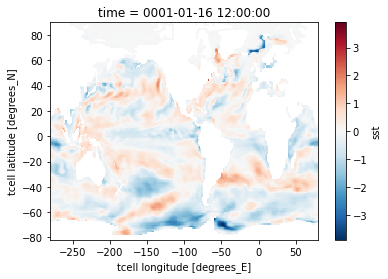

In [12]:
sst_anom.sst.isel(time=0).plot()